# Data preparation (Text Mining)

## Library dependencies

In [2]:
import sqlite3
import nltk
import matplotlib.pyplot as plt
from collections import OrderedDict
import random

In [3]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Keziro\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Keziro\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

## Sqlite storage

In [4]:
conn = sqlite3.connect('reddit.db')
c = conn.cursor()

## Stopwords

In [5]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Filtering Function

In [6]:
def wordFilter(excluded, wordrow):
    filtered = [word for word in wordrow if word not in excluded]
    return filtered

## LowerCasing

In [7]:
def lowerCaseArray(wordrow): 
    lowercased = [word.lower() for word in wordrow]
    return lowercased  

## Process data 1

In [8]:
def data_processing(sql):
    c.execute(sql)  # 1
    data = {"wordMatrix": [], "all_words": []}
    row = c.fetchone()  # 2
    while row is not None:
        wordrow = nltk.tokenize.word_tokenize(row[0] + " " + row[1])  # 3
        wordrow_lowercased = lowerCaseArray(wordrow)
        wordrow_nostopwords = wordFilter(stopwords, wordrow_lowercased)
        data["all_words"].extend(wordrow_nostopwords)  # 4
        data["wordMatrix"].append(wordrow_nostopwords)  # 5
        row = c.fetchone()  # 6
    return data


# 1 create pointer to the sqlite data
# 2 fetch the data row by row
# 3 row[0] is the title, row[1] is the topic text, we turn them into a single text blob
# 4 we will use  data['all_words'] for some data exploration
# 5 data['wordMatrix'] is a matrix comprised of wordvectors, 1 vector per document.
# 6 get a new document from the SQLite database

In [9]:
subreddits = ["datascience", "gameofthrones"]
data = {}
for subject in subreddits:
    data[subject] = data_processing(
        sql="""SELECT topicTitle,topicText,topicCategory FROM topics WHERE topicCategory = """
        + "'"
        + subject
        + "'"
    )

In [10]:
print(data['datascience']['wordMatrix'][0])

['data', 'science', 'freelancing', "'m", 'currently', 'masters', 'program', 'studying', 'business', 'analytics', "'m", 'trying', 'get', 'data', 'freelancing', '.', "'m", 'still', 'learning', 'skill', 'set', 'typically', 'see', 'right', "'m", 'fairly', 'proficient', 'sql', 'know', 'bit', 'r.', 'freelancers', 'find', 'jobs', '?']


## Explore data: word frequencies

### Category 1: Data Science

#### Word Frequencies

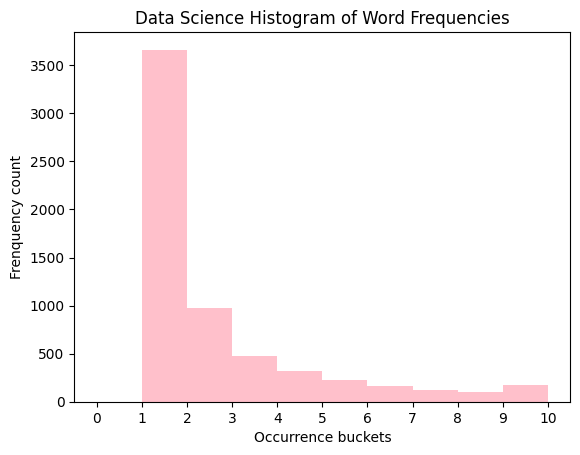

In [23]:
wordfreqs_cat1 = nltk.FreqDist(data["datascience"]["all_words"])
plt.hist(wordfreqs_cat1.values(), bins=range(11), color="pink")

plt.xticks(range(11))
plt.xlabel("Occurrence buckets")
plt.ylabel("Frenquency count")
plt.title("Data Science Histogram of Word Frequencies")

plt.savefig("graph/datascience_wordfreqs.png", dpi=300, bbox_inches="tight")

#### Most frequent words within data science posts

In [13]:
print(wordfreqs_cat1.most_common(20))

[(',', 2832), ('.', 2831), ('data', 1886), ('?', 1190), ('science', 890), (')', 812), ('(', 739), ("'m", 566), (':', 548), ('would', 427), ("'s", 323), ('like', 321), ('*', 291), ("n't", 288), ('get', 252), ('know', 225), ("'ve", 213), ('scientist', 212), ('!', 209), ('work', 204)]


#### Least Frequent terms within data science posts

In [14]:
print(wordfreqs_cat1.hapaxes())

['freelancers', 'spots', '36', '52', '//www.cdm.depaul.edu/academics/pages/current/requirements-ms-in-predictive-analytics-computational.aspx', '//online.lewisu.edu/msds/masters-in-data-science/courses', 'cmgfrm=http', '3a', '2f', '2fwww.google.com', '2furl', 'extracts', 'tags', 'alternative', 'lurker', 'inequality', 'discover', 'berk', 'northeastern', 'harsh', 'realities', 'incase', 'directx', 'fufil', 'dreams', 'oxford', 'cambridge', 'surprise', 'advancement', 'jons', 'stanford-stat', 'math-related', 'ml-related', 'specialty', 'tapping', 'a.', 'tap', 'feeds', 'b.', 'resulting', 'deliver', 'mobile', 'resources/infographics', 'interim', 'gosh', 'classifying', 'golf', 'bittersweet', '//adrianlange.com/blog/9', 'reflecting', 'marks', 'readers', 'commiserate', 'correlates', 'thoughtfully', 'ndas', 'p.s.s', '//archive.ics.uci.edu/ml/datasets/communities+and+crime+unnormalized', 'repository', 'disorganized', '//github.com/blaiseyuri/communityvscrime/blob/master/commvscrimeforest.ipynb', 'no

### Category 2: Game of Thrones

#### Word Frequencies

Text(0.5, 1.0, 'Game of Thrones Histogram of Word Frequencies')

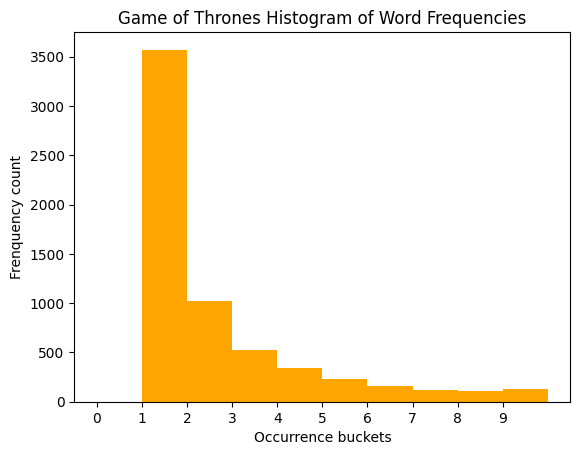

In [17]:
wordfreqs_cat2 = nltk.FreqDist(data["gameofthrones"]["all_words"])

plt.hist(wordfreqs_cat2.values(), bins=range(11), color="orange")

plt.xticks(range(10))
plt.xlabel("Occurrence buckets")
plt.ylabel("Frenquency count")
plt.title("Game of Thrones Histogram of Word Frequencies")

#### Most Frequent words within Game of Thrones posts

In [24]:
print(wordfreqs_cat2.most_common(20))

[('.', 2898), (',', 2478), ('[', 1422), (']', 1420), ('?', 1139), ("'s", 886), ("n't", 494), ('*', 477), (')', 452), ('(', 426), ('s5', 399), (':', 380), ('spoilers', 336), ('show', 327), ('would', 311), ("''", 305), ('``', 277), ('think', 248), ('season', 244), ('like', 243)]


#### Least Frequent words terms within game of thrones posts

In [25]:
print(wordfreqs_cat2.hapaxes())

['/r/got', 'chainmail', '3,500', 'sandsnaked', 'dual', 'daggers-', 'fangs', 'venom.', 's2e2', 'succeeded', 'courtesy', 'vfx', 'crew', 'comrade', 'cleans', 'filth', 'sunset', '/u/atrobro', 'rick', 'morty', 's05e07/books', 'followup', 'boudoir', 'blink', 'accusation', 'vids', 'rampant', '5.4', '11:32pm', '0.8', 'tvbythenumbers', '//tvbythenumbers.zap2it.com/2015/05/27/sunday-cable-ratings-nba-conference-finals-win-night-game-of-thrones-silicon-valley-keeping-up-with-the-kardashians-veep-more/408392/', 'accused', 'pancakes', 'prophesize', 'got-edition', 'board', 'cluedo', 'america', '/r/diy', 'reviving', 'exposed', 'website', 'littlefinger/cersei', 'immense', 'interactive', 'tracking', 'sends', 'arrive', 'possesses', 'preist', 'viserion', 'relased', 'movie', 'originally', 'propositioned', 'trilogy', 'films', 'westboro', 'baptist', 'ha', 'petition', 'rendition', 'astapor', 'partially', 'tyrione', 'plotlines', 'announcing', 'jayne', 'poole', 'sample', 'tullys', 'origin', 'westeros/essos/sot

In [26]:
# manual list takes almost every single character on the keyboard
manual_stopwords = [',','.',')',',','(','m',"'m","n't",'e.g',"'ve",'s','#','/','``',"'s","''",'!','r',']','=','[','s','&','%','*','...','1','2','3','4','5','6','7','8','9','10','--',"''",';','-',':']

## Stemming

In [27]:
stemmer = nltk.SnowballStemmer("english")

In [28]:
def wordStemmer(wordrow):
    stemmed = [stemmer.stem(word) for word in wordrow]
    return stemmed

In [29]:
def data_processing(sql, manual_stopwords):
    c.execute(sql)  # 1
    data = {"wordMatrix": [], "all_words": []}
    interWordMatrix = []
    interWordList = []
    row = c.fetchone()  # 2
    while row is not None:
        tokenizer = nltk.tokenize.RegexpTokenizer(r"\w+")  # 3
        wordrow = tokenizer.tokenize(row[0] + " " + row[1])
        wordrow_lowercased = lowerCaseArray(wordrow)
        wordrow_nostopwords = wordFilter(stopwords, wordrow_lowercased)
        wordrow_nostopwords = wordFilter(manual_stopwords, wordrow_nostopwords)  # 4
        wordrow_stemmed = wordStemmer(wordrow_nostopwords)
        interWordList.extend(wordrow_stemmed)  # 5
        interWordMatrix.append(wordrow_stemmed)  # 6
        row = c.fetchone()  # 7

    wordfreqs = nltk.FreqDist(interWordList)  # 8
    hapaxes = wordfreqs.hapaxes()  # 9
    for wordvector in interWordMatrix:
        wordvector_nohapexes = wordFilter(hapaxes, wordvector)  # 10
        data["wordMatrix"].append(wordvector_nohapexes)
        data["all_words"].extend(wordvector_nohapexes)

    return data


# 1 create pointer to the sqlite data
# 2 fetch the data one by one
# 3 row[0] is the title, row[1] is the topic text, we turn them into a single text blob
# 4 remove manual stopword
# 5 temporary wordlist used to remove hapaxes later on
# 6 temporary wordmatrix, will become final wordmatrix after hapaxes removal
# 7 get a new topic
# 8 make a frequency distribution of all terms
# 9 get the list of hapaxes
# 10 remove the hapaxes

In [30]:
for subject in subreddits:
    data[subject] = data_processing(
        sql="""SELECT topicTitle,topicText,topicCategory FROM topics WHERE topicCategory = """
        + "'"
        + subject
        + "'",
        manual_stopwords=manual_stopwords,
    )

## Process data attempt 2

## Explore data: word frequencies (attempt 2)

### Category 1

### Top 20 most common "Data Science" term after more intense data cleansing  


In [32]:
wordfreqs_cat1 = nltk.FreqDist(data["datascience"]["all_words"])
print(wordfreqs_cat1.most_common(20))

[('data', 1971), ('scienc', 955), ('would', 418), ('work', 368), ('use', 347), ('program', 343), ('learn', 342), ('like', 341), ('get', 325), ('scientist', 310), ('job', 268), ('cours', 265), ('look', 257), ('know', 239), ('statist', 228), ('want', 225), ('python', 205), ('year', 204), ('time', 196), ('go', 195)]


### Hapaxes & distribution plot

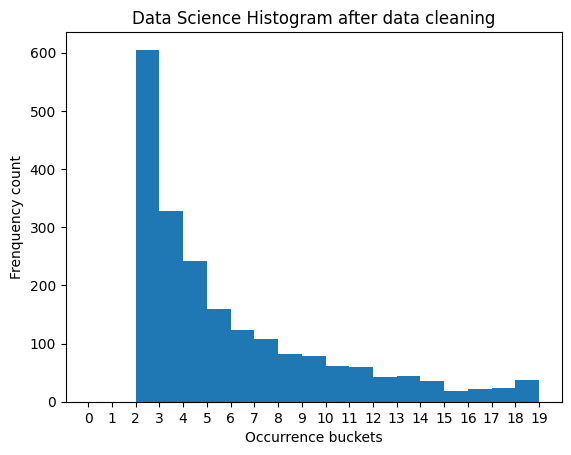

In [42]:
plt.hist(wordfreqs_cat1.values(), bins=range(20))

plt.xticks(range(20))
plt.xlabel("Occurrence buckets")
plt.ylabel("Frenquency count")
plt.title("Data Science Histogram after data cleaning")

plt.savefig("graph/datascience_wordfreqs_2.png", dpi=300, bbox_inches="tight")

In [38]:
hapaxes_cat1 = wordfreqs_cat1.hapaxes()
hapaxes_cat1

[]

### Category 2

### Top 20 most common "Game of Thrones" term after more intense data cleansing  

In [39]:
wordfreqs_cat2 = nltk.FreqDist(data["gameofthrones"]["all_words"])
print(wordfreqs_cat2.most_common(20))

[('s5', 426), ('spoiler', 373), ('show', 362), ('episod', 300), ('think', 289), ('would', 287), ('season', 286), ('like', 282), ('book', 271), ('one', 249), ('get', 236), ('sansa', 232), ('scene', 216), ('cersei', 213), ('know', 192), ('go', 188), ('king', 183), ('throne', 181), ('see', 177), ('charact', 177)]


### Hapaxes & distribution plot

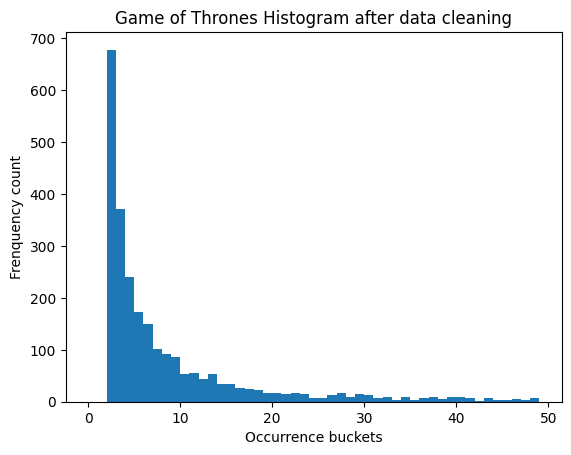

In [45]:
plt.hist(wordfreqs_cat2.values(), bins=range(50))

plt.xlabel("Occurrence buckets")
plt.ylabel("Frenquency count")
plt.title("Game of Thrones Histogram after data cleaning")

plt.savefig("graph/gameofthrones_wordfreqs_2.png", dpi=300, bbox_inches="tight")

In [41]:
hapaxes_cat2 = wordfreqs_cat2.hapaxes()
hapaxes_cat2

[]

## Create labeled data

> Từ Python 3, `xrange` được chuyển thành `range`. Đồng thời `range` sẽ trả về một `sequence object` thay vì một `list` như trước đây. Điều này giúp tiết kiệm bộ nhớ hơn, đặc biệt là khi bạn xử lý các `range` lớn. Cũng chính thế mà bạn không còn cần đóng gói `range` trong `list` như Python2 nữa. 

In [47]:
holdoutLength = 100
# labeled data
labeled_data1 = [
    (word, "datascience") for word in data["datascience"]["wordMatrix"][holdoutLength:]
]
labeled_data2 = [
    (word, "gameofthrones")
    for word in data["gameofthrones"]["wordMatrix"][holdoutLength:]
]
labeled_data = []
labeled_data.extend(labeled_data1)
labeled_data.extend(labeled_data2)
# create holdout
holdout_data = data["datascience"]["wordMatrix"][:holdoutLength]
holdout_data.extend(data["gameofthrones"]["wordMatrix"][:holdoutLength])
holdout_data_labels = [("datascience") for _ in range(holdoutLength)] + [
    ("gameofthrones") for _ in range(holdoutLength)
]

In [48]:
print(len(labeled_data))
print(len(holdout_data_labels))
print(labeled_data[20])

1647
200
(['often', 'work', 'normal', 'data', 'vs', 'straight', 'quantiti', 'reason', 'ask', 'seem', 'blog', 'exampl', 'internet', 'see', 'data', 'analysi', 'data', 'scienc', 'usual', 'show', 'trivial', 'exampl', 'obtain', 'straight', 'quantiti', 'make', 'basic', 'visual', 'work', 'data', 'analyst', 'manufactur', 'work', 'warranti', 'claim', 'quantiti', 'howev', 'compar', 'one', 'model', 'versus', 'anoth', 'model', 'use', 'straight', 'quantiti', 'meaningless', 'compar', 'model', 'order', 'make', 'fair', 'comparison', 'normal', 'data', 'divid', 'number', 'warranti', 'claim', 'defect', 'number', 'vehicl', 'sold', 'metric', 'call', 'defect', 'rate', 'warranti', 'claim', 'rate', 'know', 'manufactur', 'facil', 'use', 'term', 'percent', 'non', 'conform', 'know', 'year', 'seen', 'data', 'analyst', 'make', 'mistak', 'use', 'straight', 'quantiti', 'order', 'make', 'comparison', 'ipython', 'notebook', 'http', 'ipython', 'org', 'github', 'blob', 'master', 'work', 'state', 'wordcloud', 'ipynb', 'm

In [49]:
data["datascience"]["all_words_dedup"] = list(
    OrderedDict.fromkeys(data["datascience"]["all_words"])
)
data["gameofthrones"]["all_words_dedup"] = list(
    OrderedDict.fromkeys(data["gameofthrones"]["all_words"])
)

In [50]:
all_words = []
all_words.extend(data["datascience"]["all_words_dedup"])
all_words.extend(data["gameofthrones"]["all_words_dedup"])

In [51]:
all_words_dedup = list(OrderedDict.fromkeys(all_words))

In [52]:
prepared_data = [
    ({word: (word in x[0]) for word in all_words_dedup}, x[1]) for x in labeled_data
]

prepared_holdout_data = [
    ({word: (word in x[0]) for word in all_words_dedup}) for x in holdout_data
]

In [53]:
print(prepared_data[0])

({'data': False, 'scienc': False, 'freelanc': False, 'current': False, 'master': False, 'program': True, 'studi': False, 'busi': False, 'analyt': False, 'tri': False, 'get': False, 'still': False, 'learn': False, 'skill': False, 'set': False, 'typic': False, 'see': False, 'right': False, 'fair': False, 'profici': False, 'sql': False, 'know': True, 'bit': False, 'find': False, 'job': False, 'analyz': False, 'tv': False, 'campaign': False, 'hi': False, 'kind': False, 'analysi': False, 'done': False, 'around': False, 'run': False, 'brand': False, 'multipl': False, 'spot': False, 'day': False, 'across': False, 'channel': False, 'identifi': False, 'optim': False, 'assum': False, 'respons': False, 'direct': False, 'school': False, 'better': False, 'got': False, 'accept': False, 'two': False, 'one': False, 'lewi': False, 'univers': False, 'provid': False, 'fulli': False, 'onlin': False, 'credit': False, 'depaul': False, 'predict': False, 'requir': False, 'bachelor': False, 'physic': False, 'a

In [54]:
random.shuffle(prepared_data)
train_size = int(len(prepared_data) * 0.75)
train = prepared_data[:train_size]
test = prepared_data[train_size:]

# Text Analytics

## Naive Bayes

In [55]:
nbr_got = 0
nbr_data = 0
for set in train:
    if set[1] == "datascience":
        nbr_data += 1
    if set[1] == "gameofthrones":
        nbr_got += 1

print(nbr_got)
print(nbr_data)

607
628


In [56]:
classifier  = nltk.NaiveBayesClassifier.train(train)

In [57]:
nltk.classify.accuracy(classifier, test)

0.9830097087378641

In [58]:
print(classifier.show_most_informative_features(20))

Most Informative Features
                    data = True           datasc : gameof =    307.7 : 1.0
                  season = True           gameof : datasc =     90.0 : 1.0
                   scene = True           gameof : datasc =     54.1 : 1.0
                 analysi = True           datasc : gameof =     51.9 : 1.0
                    king = True           gameof : datasc =     39.0 : 1.0
                   watch = True           gameof : datasc =     39.0 : 1.0
                      tv = True           gameof : datasc =     38.7 : 1.0
                  episod = True           gameof : datasc =     30.7 : 1.0
                 compani = True           datasc : gameof =     25.3 : 1.0
                    kill = True           gameof : datasc =     24.6 : 1.0
                   appli = True           datasc : gameof =     21.5 : 1.0
                  master = True           datasc : gameof =     21.1 : 1.0
                     job = True           datasc : gameof =     20.3 : 1.0

In [59]:
classified_data = classifier.classify_many(prepared_holdout_data)

In [60]:
cm = nltk.ConfusionMatrix(holdout_data_labels, classified_data)

print(cm.pretty_format(sort_by_count=True, show_percents=True, truncate=9))

              |             g |
              |             a |
              |      d      m |
              |      a      e |
              |      t      o |
              |      a      f |
              |      s      t |
              |      c      h |
              |      i      r |
              |      e      o |
              |      n      n |
              |      c      e |
              |      e      s |
--------------+---------------+
  datascience | <35.5%> 14.5% |
gameofthrones |      . <50.0%>|
--------------+---------------+
(row = reference; col = test)



## Decision trees

In [61]:
classifier2 = nltk.DecisionTreeClassifier.train(train)

In [62]:
nltk.classify.accuracy(classifier2, test)

0.9247572815533981

In [63]:
print(classifier2.pseudocode(depth=4))

if data == False: 
  if python == False: 
    if machin == False: 
      if statist == False: return 'datascience'
      if statist == True: return 'datascience'
    if machin == True: return 'datascience'
  if python == True: return 'datascience'
if data == True: return 'datascience'



In [64]:
classified_data2 = classifier2.classify_many(prepared_holdout_data)

In [65]:
cm = nltk.ConfusionMatrix(holdout_data_labels, classified_data2)

print(cm.pretty_format(sort_by_count=True, show_percents=True, truncate=9))

              |             g |
              |             a |
              |      d      m |
              |      a      e |
              |      t      o |
              |      a      f |
              |      s      t |
              |      c      h |
              |      i      r |
              |      e      o |
              |      n      n |
              |      c      e |
              |      e      s |
--------------+---------------+
  datascience | <10.0%> 40.0% |
gameofthrones |      . <50.0%>|
--------------+---------------+
(row = reference; col = test)

